In [1]:
from dataset import SequenceDataset, PredDataset
from model import LSTM, Transformer, DLinear
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
df = pd.read_csv(r'F:\ML_Bootcamp\capstone_project\data\test.csv')

In [4]:
df = preprocess_data(df)

In [5]:
target = 'Close'
features = list(df.columns)

In [6]:
train_size = int(len(df)*.8)
train_df = df[:train_size+7]
test_df = df[train_size-21:]

In [7]:
scaled_train_df, scalers = scale_df(train_df)

In [8]:
scaled_test_df = apply_scalers(test_df, scalers)

In [9]:
train_dataset = SequenceDataset(scaled_train_df, target, features)
test_dataset = PredDataset(scaled_test_df, target, features)

In [10]:
train_dataset[0]

(tensor([[3.0037e-03, 2.8072e-03, 3.3024e-03, 3.5164e-03, 2.4771e-04],
         [3.5609e-03, 3.2493e-03, 3.9208e-03, 3.8898e-03, 4.5976e-04],
         [3.9271e-03, 3.4474e-03, 4.3260e-03, 4.2420e-03, 3.5427e-04],
         [4.2905e-03, 5.2485e-03, 4.6970e-03, 6.0099e-03, 8.0960e-04],
         [6.0806e-03, 5.7432e-03, 2.5167e-03, 3.7564e-03, 1.2805e-03],
         [3.8098e-03, 3.4901e-03, 2.0859e-03, 1.9839e-03, 8.2935e-04],
         [2.0448e-03, 1.3316e-03, 1.1033e-03, 2.0857e-03, 6.2324e-04],
         [2.1195e-03, 1.8647e-03, 2.1397e-03, 2.1274e-03, 2.7889e-04],
         [2.2003e-03, 1.4113e-03, 2.0186e-03, 1.9939e-03, 2.3090e-04],
         [2.0281e-03, 1.4298e-03, 2.3645e-03, 2.0713e-03, 1.5661e-04],
         [2.1186e-03, 1.5013e-03, 1.1405e-04, 0.0000e+00, 7.1266e-04],
         [0.0000e+00, 4.5893e-05, 0.0000e+00, 4.3167e-04, 4.6016e-04],
         [4.5513e-04, 8.8913e-05, 3.9456e-04, 7.3697e-04, 3.0811e-04],
         [7.9626e-04, 1.8392e-04, 9.2265e-04, 6.4814e-04, 9.1795e-05],
      

In [11]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [12]:
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [13]:

n_epochs = 5 # 5 epochs
learning_rate = 0.001 # 0.001 lr

lstm = LSTM()
transformer = Transformer()
dlinear = DLinear()

In [18]:
loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser1 = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
optimiser2 = torch.optim.Adam(transformer.parameters(), lr=learning_rate)
optimiser3 = torch.optim.Adam(dlinear.parameters(), lr=learning_rate)

In [15]:
train(n_epochs=n_epochs,
              model=lstm,
              optimiser=optimiser1,
              loss_fn=loss_fn,
              train_loader=train_loader)

batch #: 0, current average train loss: 0.25494
batch #: 20, current average train loss: 0.05591
batch #: 40, current average train loss: 0.03533
batch #: 60, current average train loss: 0.02521
batch #: 80, current average train loss: 0.01961
batch #: 100, current average train loss: 0.01617
batch #: 120, current average train loss: 0.01391
batch #: 140, current average train loss: 0.01228
batch #: 160, current average train loss: 0.01098
batch #: 180, current average train loss: 0.00998
batch #: 200, current average train loss: 0.00925
Epoch: 0, train loss: 0.00882
batch #: 0, current average train loss: 0.00042
batch #: 20, current average train loss: 0.00278
batch #: 40, current average train loss: 0.00253
batch #: 60, current average train loss: 0.00210
batch #: 80, current average train loss: 0.00215
batch #: 100, current average train loss: 0.00204
batch #: 120, current average train loss: 0.00200
batch #: 140, current average train loss: 0.00213
batch #: 160, current average tr

In [16]:
train(n_epochs=n_epochs,
              model=transformer,
              optimiser=optimiser2,
              loss_fn=loss_fn,
              train_loader=train_loader, model_type=1)

batch #: 0, current average train loss: 0.07582
batch #: 20, current average train loss: 0.19676
batch #: 40, current average train loss: 0.11558
batch #: 60, current average train loss: 0.08203
batch #: 80, current average train loss: 0.06469
batch #: 100, current average train loss: 0.05392
batch #: 120, current average train loss: 0.04691
batch #: 140, current average train loss: 0.04146
batch #: 160, current average train loss: 0.03744
batch #: 180, current average train loss: 0.03408
batch #: 200, current average train loss: 0.03141
Epoch: 0, train loss: 0.02994
batch #: 0, current average train loss: 0.00889
batch #: 20, current average train loss: 0.00552
batch #: 40, current average train loss: 0.00558
batch #: 60, current average train loss: 0.00590
batch #: 80, current average train loss: 0.00609
batch #: 100, current average train loss: 0.00597
batch #: 120, current average train loss: 0.00579
batch #: 140, current average train loss: 0.00561
batch #: 160, current average tr

In [19]:

train(n_epochs=n_epochs,
              model=dlinear,
              optimiser=optimiser3,
              loss_fn=loss_fn,
              train_loader=train_loader)

batch #: 0, current average train loss: 0.06514
batch #: 20, current average train loss: 0.13773
batch #: 40, current average train loss: 0.10659
batch #: 60, current average train loss: 0.08390
batch #: 80, current average train loss: 0.06887
batch #: 100, current average train loss: 0.05881
batch #: 120, current average train loss: 0.05069
batch #: 140, current average train loss: 0.04447
batch #: 160, current average train loss: 0.03969
batch #: 180, current average train loss: 0.03599
batch #: 200, current average train loss: 0.03307
Epoch: 0, train loss: 0.03149
batch #: 0, current average train loss: 0.00238
batch #: 20, current average train loss: 0.00389
batch #: 40, current average train loss: 0.00424
batch #: 60, current average train loss: 0.00432
batch #: 80, current average train loss: 0.00393
batch #: 100, current average train loss: 0.00371
batch #: 120, current average train loss: 0.00362
batch #: 140, current average train loss: 0.00343
batch #: 160, current average tr

In [20]:
preds1 = test(lstm, loss_fn, test_loader)

test loss: 0.00291


In [21]:
preds2 = test(transformer, loss_fn, test_loader, model_type=1)

test loss: 0.00386


In [22]:
preds3 = test(dlinear, loss_fn, test_loader)

test loss: 0.00347


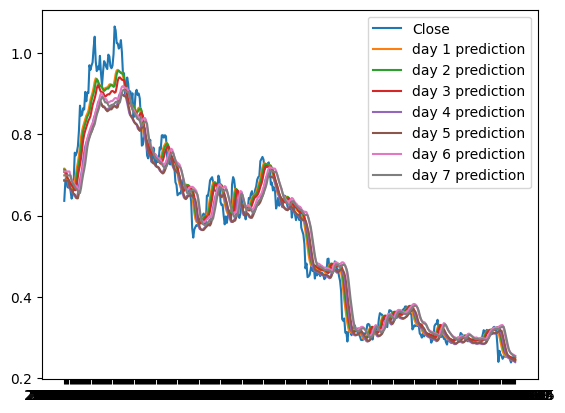

In [23]:
plot_test(scaled_test_df, preds1)

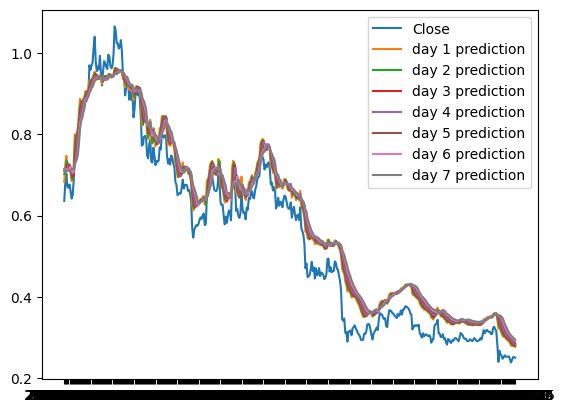

In [24]:
plot_test(scaled_test_df, preds2)

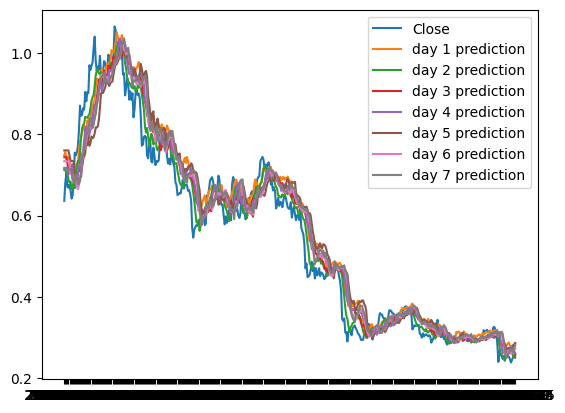

In [25]:
plot_test(scaled_test_df, preds3)

In [26]:
scaled_df = apply_scalers(df, scalers)

In [27]:
dataset = PredDataset(scaled_df, target, features)
loader = DataLoader(dataset, batch_size=8, shuffle=False)

In [28]:
entire_preds1 = test(lstm, loss_fn, loader)

test loss: 0.00143


In [29]:
entire_preds2 = test(transformer, loss_fn, loader, model_type=1)

test loss: 0.00176


In [32]:
entire_preds3 = test(dlinear, loss_fn, loader)

test loss: 0.00190


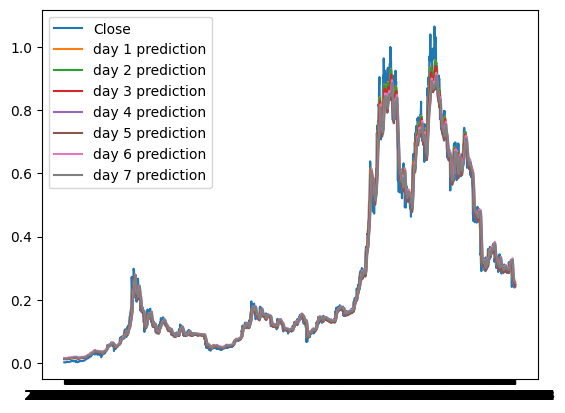

In [30]:
plot_test(scaled_df, entire_preds1)

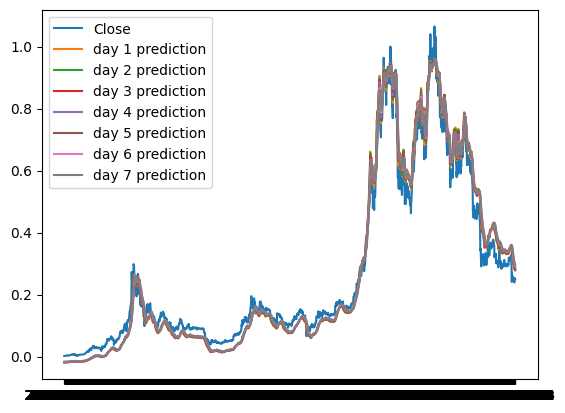

In [31]:
plot_test(scaled_df, entire_preds2)

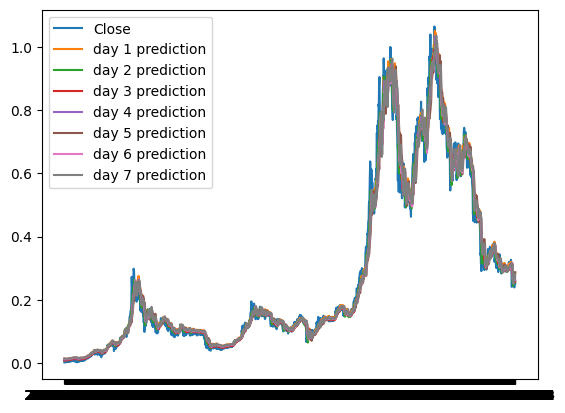

In [33]:
plot_test(scaled_df, entire_preds3)

In [35]:
torch.save(lstm, 'models/test')

In [36]:
model = torch.load('models/test')

In [37]:
print(model)

LSTM(
  (lstm1): LSTMCell(5, 128)
  (lstm2): LSTMCell(128, 128)
  (linear): Linear(in_features=128, out_features=7, bias=True)
)


In [38]:
entire_preds1 = test(model, loss_fn, loader)

test loss: 0.00143
